In [1]:
from os import chdir, getcwd
getcwd()
chdir('C:\\Users\\khanh\\Desktop\\GMUeducation\\AIT614\\TeamProject')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
#pio.renderers.default = 'svg'
import seaborn as sns
pio.renderers.default = 'browser'
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%%time
df = pd.read_csv('public_150k_plus_220403.csv')
df.columns

Wall time: 19.3 s


Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerName', 'BorrowerAddress', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatusDate', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'UndisbursedAmount', 'FranchiseName',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'CD', 'JobsReported',
       'NAICSCode', 'Race', 'Ethnicity', 'UTILITIES_PROCEED',
       'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED',
       'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
       'DEBT_INTEREST_PROCEED', 'BusinessType', 'OriginatingLenderLocationID',
       'OriginatingLender', 'Originatin

In [3]:
df_flag=pd.DataFrame()
df_flag

df_flag['LoanNumber'] =df['LoanNumber']
df_flag['Gender'] = df['Gender']
df_flag['BusinessType'] =df['BusinessType']
df_flag['Race'] = df['Race']
df_flag['BusinessAgeDescription'] = df['BusinessAgeDescription']

#df_flag['JobsReported'] = df['JobsReported']
#df_flag['ForgivenessAmount'] = df['ForgivenessAmount']

#Coerce nonnumeric data into numeric and fill na with 0
#df_flag['ForgivenessAmount'] = (pd.to_numeric(df_flag['ForgivenessAmount'],errors='coerce').fillna(0))
#df_flag['JobsReported'] = (pd.to_numeric(df_flag['JobsReported'],errors='coerce').fillna(0))

df_flag['BusinessType'] = df_flag['BusinessType'].fillna("Unknown")
df_flag['BusinessAgeDescription'] = df_flag['BusinessAgeDescription'].fillna("Unanswered")
#df_clean = df.fillna("Unknown")

"""D_address"""
df_flag['D_BorrowerAddress'] = df["BorrowerAddress"].duplicated(keep=False)


df_flag["D_BorrowerAddress"] = df_flag["D_BorrowerAddress"].astype(int)

#df_flag["D_BorrowerAddress"].hist(bins=2)


"""D_BorrowerName"""


df_flag['D_BorrowerName'] = df["BorrowerName"].duplicated(keep=False)

df_flag["D_BorrowerName"] = df_flag["D_BorrowerName"].astype(int)
df_flag["D_BorrowerName"].sum()

#df_flag["D_BorrowerName"].hist(bins=2)

"""Forgiveness"""
df_flag["Forgiveness"] = (df["ForgivenessAmount"] > 0).astype(int)



"""LoanStatus"""
df1 = pd.concat([pd.get_dummies(df[['LoanStatus']] , drop_first=True), df], axis=1)
df1.columns

df_flag['LoanStatus_Paid in Full']= df1['LoanStatus_Paid in Full']



"""BusinessAgeDescription"""
df_flag["No_BusinessAgeDescription"] = (df["BusinessAgeDescription"] == 'Unanswered').astype(int)
df_flag["No_BusinessAgeDescription"].sum()

df_flag["LT2_BusinessAgeDescription"] = (df["BusinessAgeDescription"] == 'New Business or 2 years or less').astype(int)
df_flag["LT2_BusinessAgeDescription"].sum()



"""HubzoneIndicator"""
df_flag["HubzoneIndicator"] = (df["HubzoneIndicator"] == 'Y').astype(int)
df_flag["HubzoneIndicator"].sum()


"""RuralUrbanIndicator"""
df_flag["RuralUrbanIndicator"] = (df["RuralUrbanIndicator"] == 'R').astype(int)
df_flag["RuralUrbanIndicator"].sum()

"""df["JobsReported"]"""
df_flag["No_JobsAmount"] =  (df["JobsReported"] == 0).astype(int)
df_flag["No_JobsAmount"].sum()


df["JobsReported"] = df["JobsReported"].replace(0,1)
#df["JobsReported"] = df["JobsReported"].replace(-6,6)


"""Amount_Greater_25k_per_Employee"""

df["Amount_Greater_25k_per_Employee"] = df["CurrentApprovalAmount"] / df["JobsReported"]
df["Amount_Greater_25k_per_Employee"].isnull().sum()

df_flag["Amount_Greater_25k_per_Employee"] = (df["Amount_Greater_25k_per_Employee"] >25000).astype(int)
df_flag["Amount_Greater_25k_per_Employee"].sum()
#df["Amount_Greater_25k_per_Employee"].describe()

columns_list = ['D_BorrowerAddress', 'D_BorrowerName', 'Forgiveness',
       'LoanStatus_Paid in Full', 'No_BusinessAgeDescription',
       'LT2_BusinessAgeDescription', 'HubzoneIndicator', 'RuralUrbanIndicator',
       'No_JobsAmount', 'Amount_Greater_25k_per_Employee']
df_flag['Sum_Indicator'] = df_flag[columns_list].sum(axis=1)


df_flag['Fraud_Alerted'] = np.where(df_flag['Sum_Indicator'] > 3, 'Yes', 'No')



In [4]:
df["Amount_Greater_25k_per_Employee"].describe()

count    9.685310e+05
mean     1.285118e+04
std      2.064187e+04
min      3.000000e+02
25%      8.016800e+03
50%      1.153993e+04
75%      1.544000e+04
max      6.512998e+06
Name: Amount_Greater_25k_per_Employee, dtype: float64

In [5]:
df_flag.head()

,LoanNumber,Gender,BusinessType,Race,BusinessAgeDescription,D_BorrowerAddress,D_BorrowerName,Forgiveness,LoanStatus_Paid in Full,No_BusinessAgeDescription,LT2_BusinessAgeDescription,HubzoneIndicator,RuralUrbanIndicator,No_JobsAmount,Amount_Greater_25k_per_Employee,Sum_Indicator,Fraud_Alerted
0,9547507704,Unanswered,Corporation,Unanswered,Existing or more than 2 years old,0,0,1,1,0,0,0,0,0,0,2,No
1,9777677704,Male Owned,Sole Proprietorship,White,Existing or more than 2 years old,0,0,1,1,0,0,1,0,0,0,3,No
2,5791407702,Unanswered,Non-Profit Organization,Unanswered,New Business or 2 years or less,0,0,1,1,0,1,0,0,0,0,3,No
3,6223567700,Male Owned,Corporation,American Indian or Alaska Native,New Business or 2 years or less,0,0,1,1,0,1,0,0,0,0,3,No
4,9662437702,Unanswered,Unknown,Unanswered,Unanswered,1,0,1,1,1,0,0,0,0,0,4,Yes


In [6]:
df_flag.columns

Index(['LoanNumber', 'Gender', 'BusinessType', 'Race',
       'BusinessAgeDescription', 'D_BorrowerAddress', 'D_BorrowerName',
       'Forgiveness', 'LoanStatus_Paid in Full', 'No_BusinessAgeDescription',
       'LT2_BusinessAgeDescription', 'HubzoneIndicator', 'RuralUrbanIndicator',
       'No_JobsAmount', 'Amount_Greater_25k_per_Employee', 'Sum_Indicator',
       'Fraud_Alerted'],
      dtype='object')

In [7]:
#convert data type to categorical
df_flag = df_flag.astype({"LoanNumber":'str', "Gender":'category', "BusinessType":'category', 
                          "Race":'category', "BusinessAgeDescription":'category'})

In [8]:
df_flag.dtypes

LoanNumber                           object
Gender                             category
BusinessType                       category
Race                               category
BusinessAgeDescription             category
D_BorrowerAddress                     int32
D_BorrowerName                        int32
Forgiveness                           int32
LoanStatus_Paid in Full               uint8
No_BusinessAgeDescription             int32
LT2_BusinessAgeDescription            int32
HubzoneIndicator                      int32
RuralUrbanIndicator                   int32
No_JobsAmount                         int32
Amount_Greater_25k_per_Employee       int32
Sum_Indicator                         int64
Fraud_Alerted                        object
dtype: object

In [9]:
df_flag.isnull().sum() #.values.any())

LoanNumber                         0
Gender                             0
BusinessType                       0
Race                               0
BusinessAgeDescription             0
D_BorrowerAddress                  0
D_BorrowerName                     0
Forgiveness                        0
LoanStatus_Paid in Full            0
No_BusinessAgeDescription          0
LT2_BusinessAgeDescription         0
HubzoneIndicator                   0
RuralUrbanIndicator                0
No_JobsAmount                      0
Amount_Greater_25k_per_Employee    0
Sum_Indicator                      0
Fraud_Alerted                      0
dtype: int64

In [10]:
df_flag['BusinessAgeDescription'].value_counts()

Existing or more than 2 years old         861917
New Business or 2 years or less            54851
Unanswered                                 51052
Change of Ownership                          422
Startup, Loan Funds will Open Business       290
Name: BusinessAgeDescription, dtype: int64

In [11]:
df_flag['BusinessType'].value_counts()

Corporation                            417853
Limited  Liability Company(LLC)        261295
Subchapter S Corporation               175408
Non-Profit Organization                 55699
Partnership                             18141
Limited Liability Partnership           12722
Sole Proprietorship                     12319
Professional Association                 6384
Cooperative                              2436
501(c)3 – Non Profit                     1771
Non-Profit Childcare Center               900
501(c)6 – Non Profit Membership           764
Unknown                                   722
Employee Stock Ownership Plan(ESOP)       638
Self-Employed Individuals                 495
Trust                                     403
Housing Co-op                             152
Joint Venture                             129
Independent Contractors                   113
Single Member LLC                          77
Tribal Concerns                            64
Tenant in Common                  

In [12]:
df_flag['Fraud_Alerted'].value_counts()

No     768597
Yes    199935
Name: Fraud_Alerted, dtype: int64

In [13]:
df_flag.to_csv('flag_public_up_to_150k_220403.csv',index=False)


In [14]:
df_flag['LoanStatus_Paid in Full'].value_counts()

1    835009
0    133523
Name: LoanStatus_Paid in Full, dtype: int64

In [15]:
df_flag['Forgiveness'].value_counts()

1    874822
0     93710
Name: Forgiveness, dtype: int64

<AxesSubplot:>

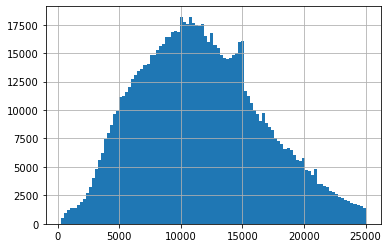

In [78]:
import matplotlib.pyplot as plt
less25k =  df['Amount_Greater_25k_per_Employee'] < 25000
gapminder_25k = df[less25k]
gapminder_25k["Amount_Greater_25k_per_Employee"].hist(bins=100)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Amount_Greater_25k_per_Employee'>

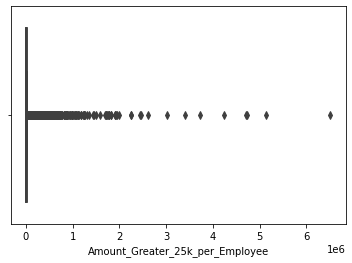

In [17]:
sns.boxplot(df["Amount_Greater_25k_per_Employee"])
sns.boxplot(gapminder_2002["Amount_Greater_25k_per_Employee"])

In [31]:
df3 = df_flag.loc[df_flag.Fraud_Alerted=='Yes'].groupby(['BusinessAgeDescription'])['Fraud_Alerted'].count().reset_index()
#df2['count'] = df2.groupby(['Country_of_birth']).transform('count')
df3 = pd.DataFrame(df3)
df3['Count'] = df3['Fraud_Alerted']
sorted_df = df3.sort_values(by='Fraud_Alerted', ascending=False)
print("Get the top Business Type with the most frauds")
sorted_df.head(20)

Get the top Business Type with the most frauds


,BusinessAgeDescription,Fraud_Alerted,Count
1,Existing or more than 2 years old,147185,147185
2,New Business or 2 years or less,26783,26783
4,Unanswered,25815,25815
0,Change of Ownership,100,100
3,"Startup, Loan Funds will Open Business",52,52


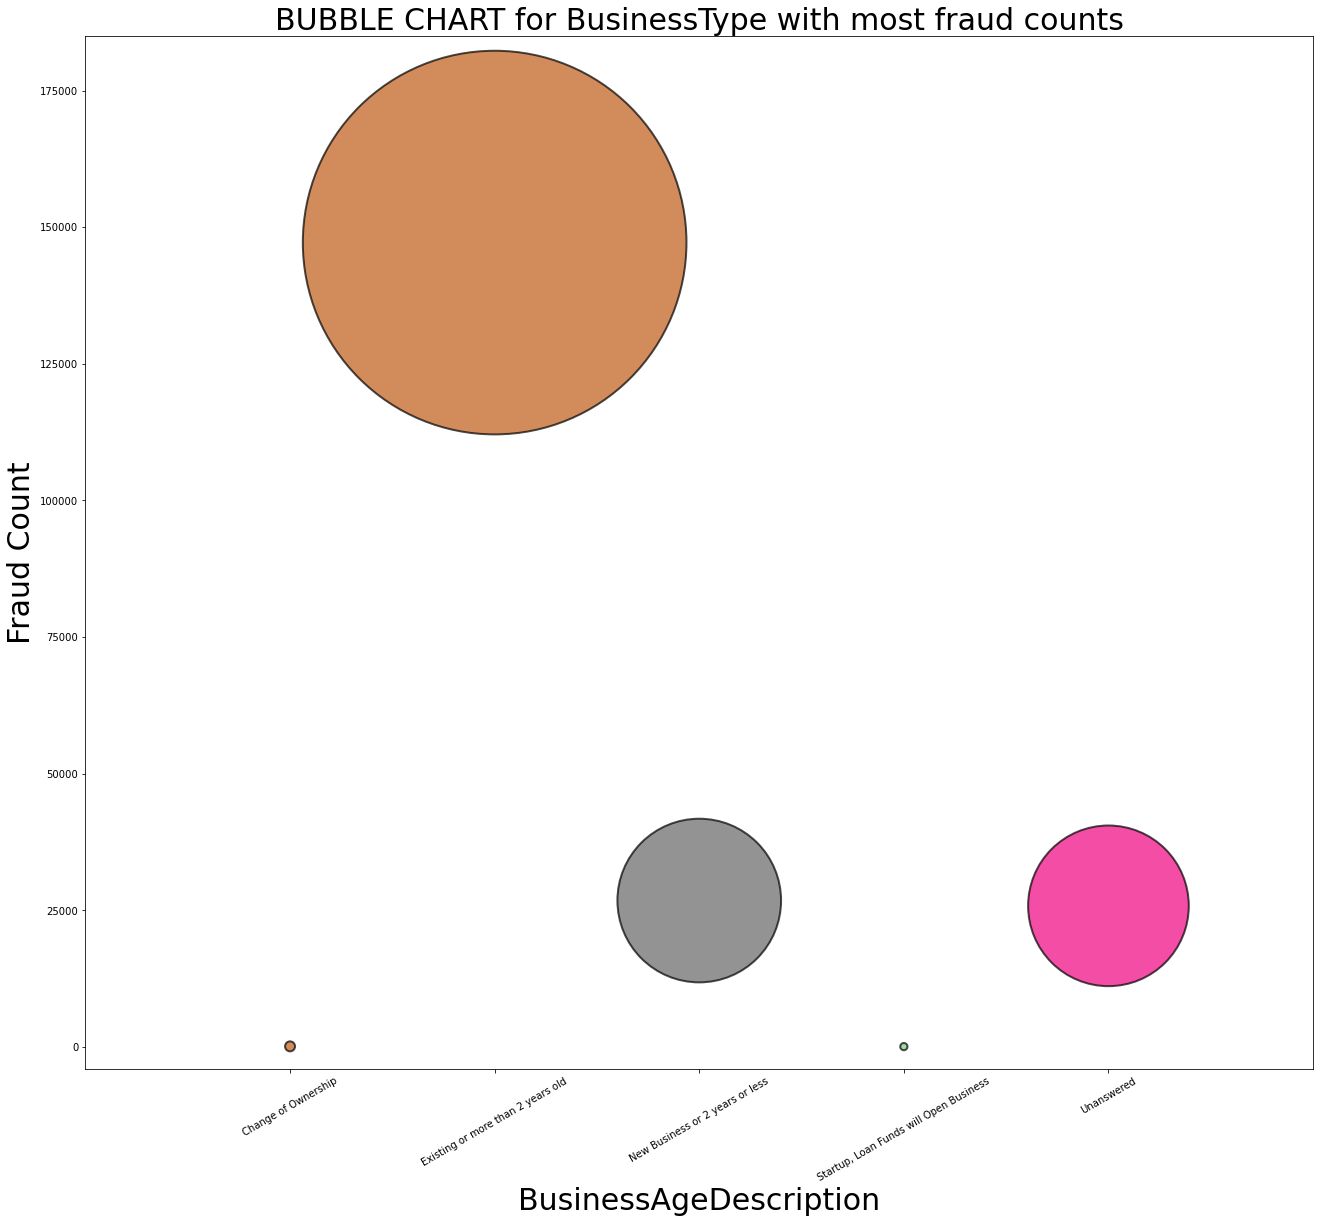

In [74]:
import seaborn as sns
df3['BusinessAgeDescription']= pd.Categorical(df3['BusinessAgeDescription'])

colors_list=np.random.rand(5)
#plt.scatter(x,y,s=sizes*500,c=colors_list)
# Set the figure size
plt.figure(figsize=(22, 19))


# Scatterplot
#ax = plt.gca()
ax = plt.scatter(
    x = df3['BusinessAgeDescription'], 
    y = df3['Count'], 
    s= df3['Fraud_Alerted'], 
    #c=df3['Country_of_birth'].cat.codes,
    c = colors_list,
    cmap="Accent", 
    alpha=0.7, 
    edgecolors="black", 
    linewidth=2);


# Add titles (main and on axis)
#plt.yscale('log')
plt.yscale('linear')
plt.xlabel("BusinessAgeDescription", size = 30)
plt.ylabel("Fraud Count", size = 30)
plt.title("BUBBLE CHART for BusinessType with most fraud counts", size = 30)
plt.ylim(-4000,185000)
plt.xlim(-1, 5)
plt.xticks(rotation=30)


plt.show()

In [63]:
df4 = df_flag.loc[df_flag.Fraud_Alerted=='Yes'].groupby(['BusinessType'])['Fraud_Alerted'].count().reset_index()
#df2['count'] = df2.groupby(['Country_of_birth']).transform('count')
df4 = pd.DataFrame(df4)
df4['Count'] = df4['Fraud_Alerted']
sorted_df = df4.sort_values(by='Fraud_Alerted', ascending=False)
print("Get the top Business Type with the most frauds")
sorted_df.head(20)

Get the top Business Type with the most frauds


,BusinessType,Fraud_Alerted,Count
5,Corporation,82912,82912
10,Limited Liability Company(LLC),58174,58174
21,Subchapter S Corporation,33710,33710
13,Non-Profit Organization,13325,13325
14,Partnership,3983,3983
11,Limited Liability Partnership,2699,2699
20,Sole Proprietorship,1976,1976
15,Professional Association,1395,1395
4,Cooperative,672,672
2,501(c)3 – Non Profit,316,316


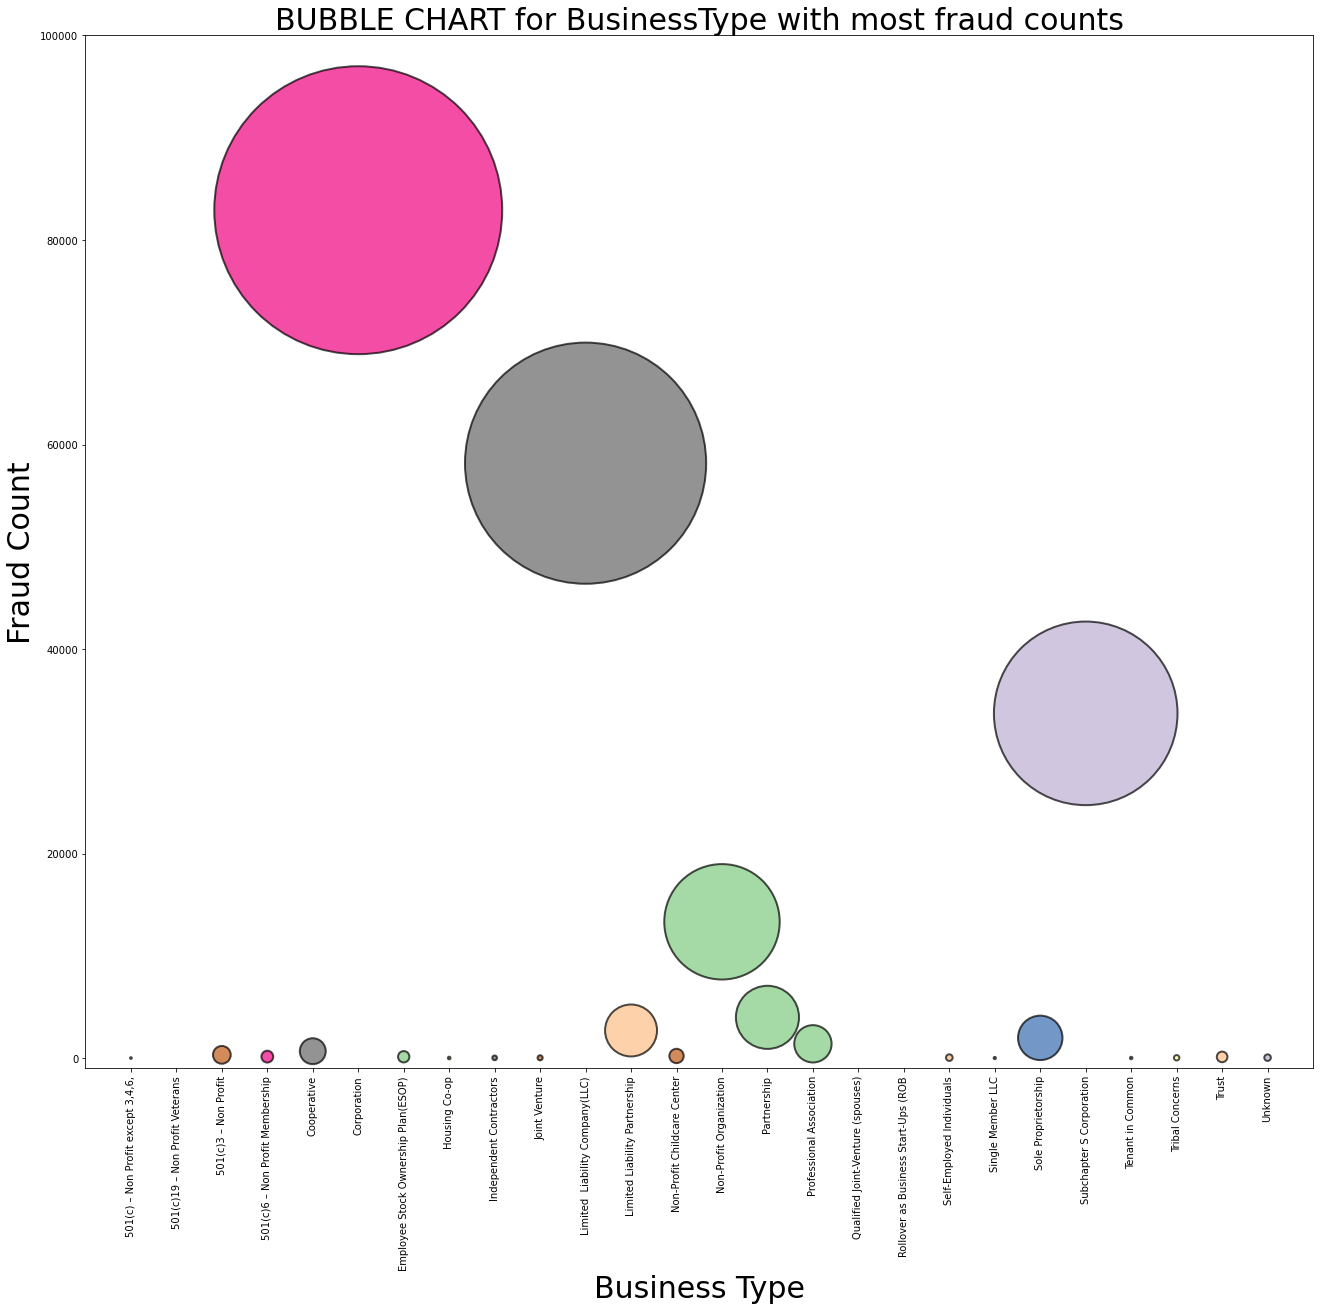

In [67]:
import seaborn as sns
df4['BusinessType']= pd.Categorical(df4['BusinessType'])

colors_list=np.random.rand(26)
#plt.scatter(x,y,s=sizes*500,c=colors_list)
# Set the figure size
plt.figure(figsize=(22, 19))


# Scatterplot
#ax = plt.gca()
ax = plt.scatter(
    x = df4['BusinessType'], 
    y = df4['Count'], 
    s= df4['Fraud_Alerted'], 
    #c=df3['Country_of_birth'].cat.codes,
    c = colors_list,
    cmap="Accent", 
    alpha=0.7, 
    edgecolors="black", 
    linewidth=2);


# Add titles (main and on axis)
#plt.yscale('log')
plt.yscale('linear')
plt.xlabel("Business Type", size = 30)
plt.ylabel("Fraud Count", size = 30)
plt.title("BUBBLE CHART for BusinessType with most fraud counts", size = 30)
plt.ylim(-1000,100000)
plt.xlim(-1, 26)
plt.xticks(rotation=90)


plt.show()

In [93]:
df_race = df_flag.loc[df_flag.Fraud_Alerted=='Yes'].groupby(['Race'])['Fraud_Alerted'].count().reset_index()
df_race = pd.DataFrame(df_race)
df_race['Count'] = df_race['Fraud_Alerted']
sorted_df = df_race.sort_values(by='Fraud_Alerted', ascending=False)
print("Get the top Business Type with the most frauds")
sorted_df.head(20)


Get the top Business Type with the most frauds


,Race,Fraud_Alerted,Count
7,Unanswered,160079,160079
8,White,33039,33039
1,Asian,3844,3844
0,American Indian or Alaska Native,1553,1553
2,Black or African American,1297,1297
5,Native Hawaiian or Other Pacific Islander,116,116
6,Puerto Rican,7,7
3,Eskimo & Aleut,0,0
4,Multi Group,0,0


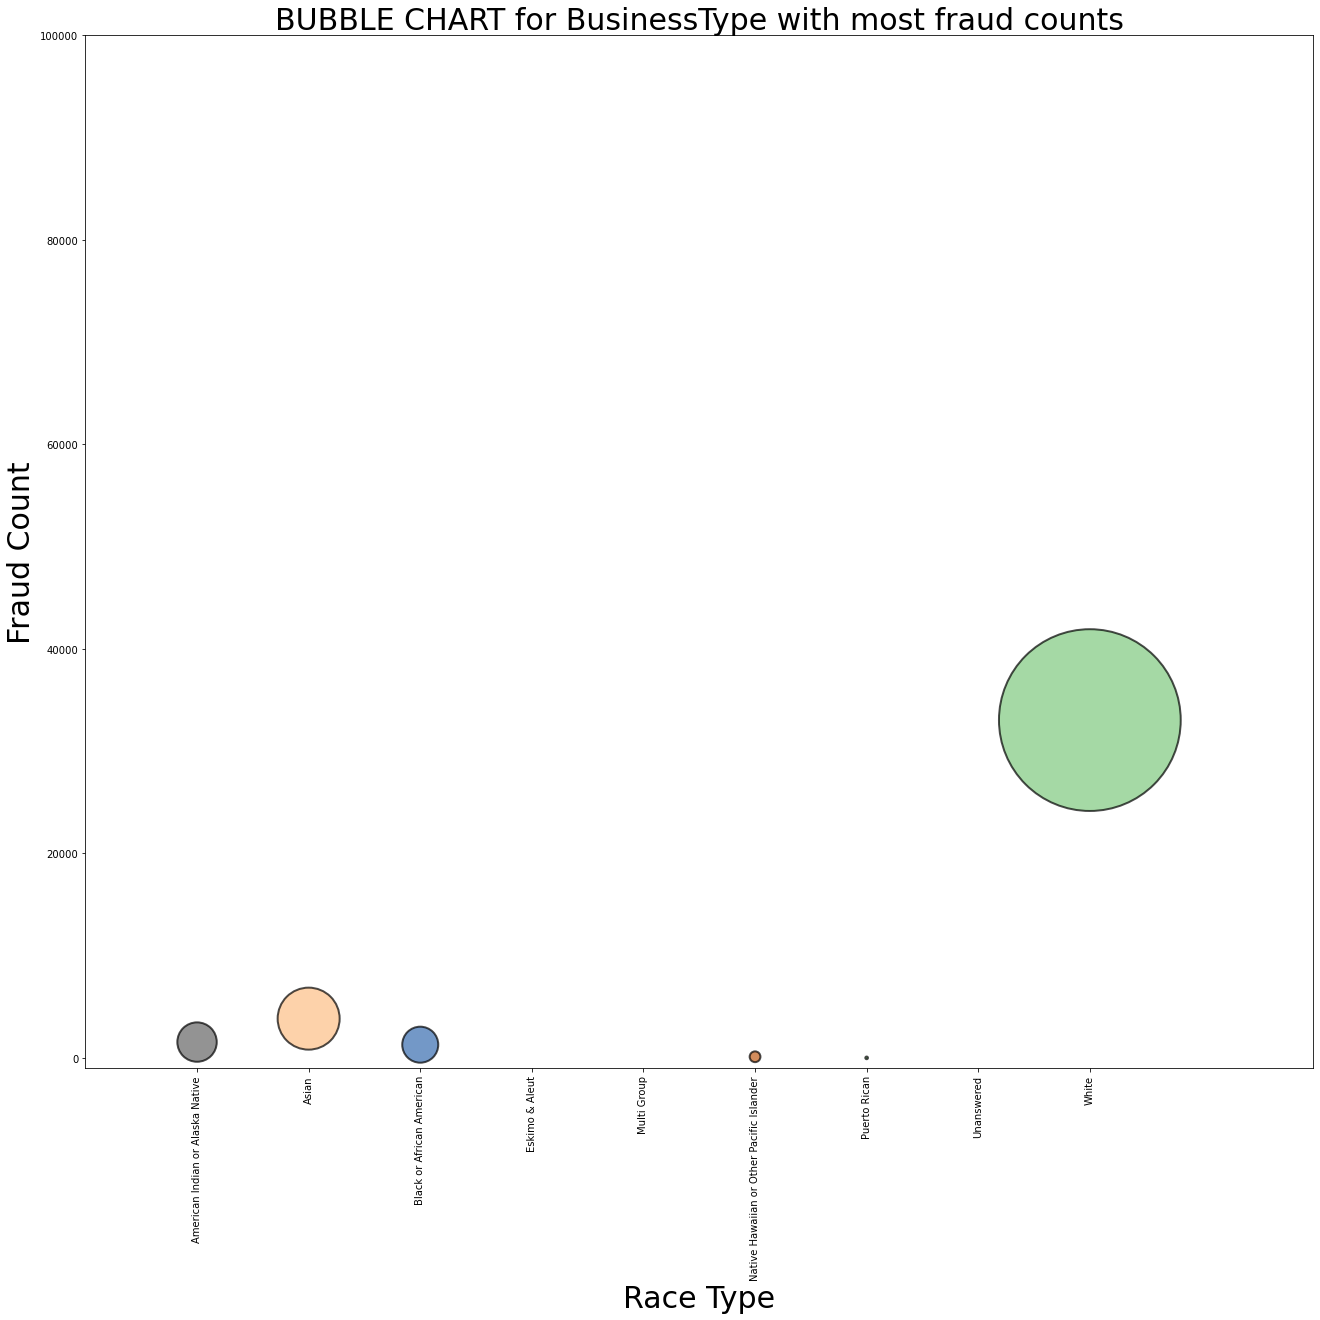

In [95]:
import seaborn as sns
df_race['Race']= pd.Categorical(df_race['Race'])

colors_list=np.random.rand(9)
#plt.scatter(x,y,s=sizes*500,c=colors_list)
# Set the figure size
plt.figure(figsize=(22, 19))


# Scatterplot
#ax = plt.gca()
ax = plt.scatter(
    x = df_race['Race'], 
    y = df_race['Count'], 
    s= df_race['Fraud_Alerted'], 
    #c=df3['Country_of_birth'].cat.codes,
    c = colors_list,
    cmap="Accent", 
    alpha=0.7, 
    edgecolors="black", 
    linewidth=2);


# Add titles (main and on axis)
#plt.yscale('log')
plt.yscale('linear')
plt.xlabel("Race Type", size = 30)
plt.ylabel("Fraud Count", size = 30)
plt.title("BUBBLE CHART for Race with most fraud counts", size = 30)
plt.ylim(-1000,100000)
plt.xlim(-1, 10)
plt.xticks(rotation=90)


plt.show()